In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# find current working directory using os module
os.getcwd()

'/Users/Tarek/Documents/masterRootAppFolder/EarlyDetection3DPrinterIssues'

In [3]:
DATA_PATH = '/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues'
# reset path to data directory
os.chdir(DATA_PATH)

In [4]:
cwd = os.getcwd()
cwd

'/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues'

In [5]:
os.listdir(cwd)

['images', 'test.csv', 'train.csv', 'sample_submission.csv']

In [6]:
# load train dataset into a dataframe
train_df = pd.read_csv('./train.csv')

In [7]:
train_df.head()

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
1,101/1678589738/1678589914.462857.jpg,101,1678589738,1
2,101/1678589738/1678589914.875075.jpg,101,1678589738,1
3,101/1678589738/1678589915.284495.jpg,101,1678589738,1
4,101/1678589738/1678589915.700486.jpg,101,1678589738,1


In [8]:
# view size of dataframe
train_df.shape

(81060, 4)

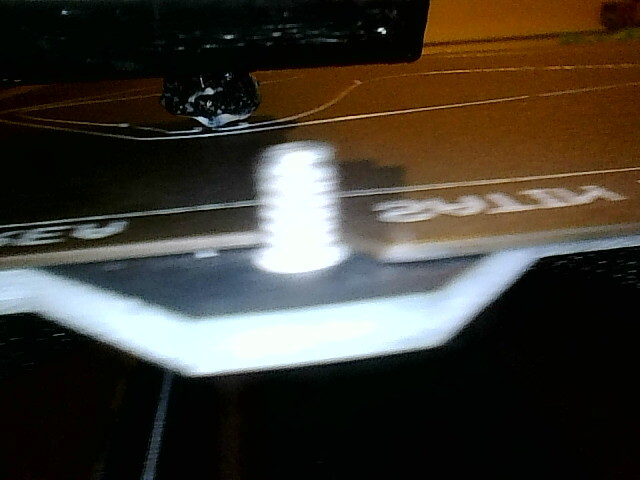

In [9]:
# render the first image of the train dataset
train_image = Image.open('./images/' + train_df['img_path'][0])
train_image

In [10]:
# create a function to render a train image from dataframe
def render_train_image(index):
        train_image = Image.open('./images/' + train_df['img_path'][index])
        return train_image

In [11]:
# create a function to transform jpg train image to a numpy array
def train_image_to_array(index):
        train_image = Image.open('./images/' + train_df['img_path'][index])
        train_image_array = np.array(train_image)
        return train_image_array

In [12]:
image_1_array = train_image_to_array(0)
image_1_array.shape

(480, 640, 3)

In [13]:
train_image_arrays = []
unique_train_images_shapes = []

In [14]:
# loop through each image in train dataset and check if the numpy shape are the same
for i in range(0, len(train_df)):
        image_array = train_image_to_array(i)
        train_image_arrays.append(image_array)
        if image_array.shape != image_1_array.shape:
                print(f'Image shape is not {image_1_array.shape} at index: ', i)
                unique_train_images_shapes.append(i)